In [1]:
import sys
sys.path.append('..')
import igraph as ig
#import pyzx
from pyzx.drawing import *
from pyzx.rules import *

ImportError: No module named igraph

In [6]:
h = ig.Graph()
h.add_vertices(6)
h.vs['t'] = 0
h.vs[2]['t'] = 1
h.vs[3]['t'] = 2
h.add_edges([(0,2),(1,2),(2,3),(3,4),(3,5)])

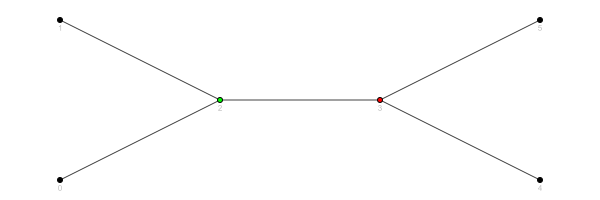

In [7]:
draw(h)

In [9]:
h1 = h.copy()
bialg(h1,[2,3])

True

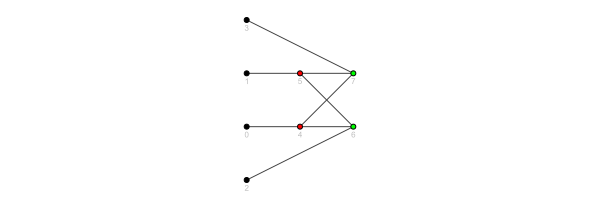

In [10]:
draw(h1)

In [11]:
def zigzag(sz):
    g = ig.Graph()
    g.add_vertices(2*sz+4)
    for i in range(1,sz+1):
        g.vs[2*i]['t'] = (i%2)+1
        g.vs[2*i+1]['t'] = (i%2)+1
    g.add_edges([(0,2),(1,3)])
    g.add_edges([(2*i,2*i+2) for i in range(1,sz)])
    g.add_edges([(2*i,2*i+3) for i in range(1,sz)])
    g.add_edges([(2*i+1,2*i+2) for i in range(1,sz)])
    g.add_edges([(2*i+1,2*i+3) for i in range(1,sz)])
    g.add_edges([(2*sz,2*sz+2),(2*sz+1,2*sz+3)])
    return g

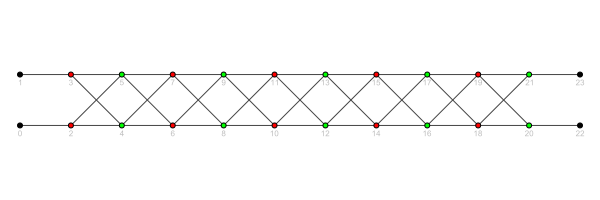

In [12]:
draw(zigzag(10))

Wall time: 259 ms


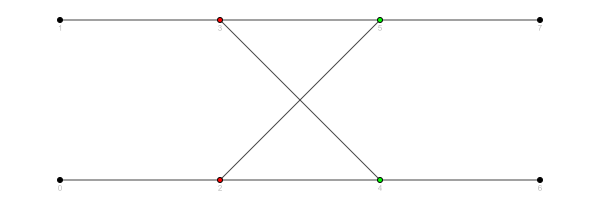

In [13]:
g1 = zigzag(1000)
def f():
    while True:
        m = match_bialg(g1, interior=True)
        if m: bialg(g1, m)
        else: break

%time f()
draw(g1)